**DESCRIPTION**

The EDA project in Sarva/Samagra Shiksha Abhiyan financial data involves analyzing historical budget allocation and expenditure data to identify patterns and trends. Using this analysis, a predictive model is developed to estimate the budget allocation for the next year.

**ABBREVIATION USED**

1. SMA - SARVA SHIKSHA ABHIYAN

2. SMSA - SAMAGRA SHIKSHA ABHIYAN

#PHASE 1 --> DATA UNDERSTANDING

#Reading and Writing

**Importing the relavant libraries**

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno         #for missing value plot

**Importing dataset**

In [223]:
#IMPORTING DATASET 
#Data source - https://openbudgetsindia.org/dataset/sarva-shiksha-abhiyan-ssa-2015-16-to-2017-18
ssa_df = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/EDA-SHARVA-SHIKSHA-ABHIYAN/main/ssacsv.csv?token=GHSAT0AAAAAAB5J5GGWR277QD5INAQZ4MY4ZCJL4YA")
smsa_df = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/EDA-SHARVA-SHIKSHA-ABHIYAN/main/smsa.csv?token=GHSAT0AAAAAAB5J5GGWUZVBPBXPWCNRRKQKZCJL5ZQ")

**Observe the various columns in the dataset**

In [224]:
ssa_df.columns

Index(['State', 'State_UT_Code', 'Financial Year', 'Budget Approved',
       'Funds Released by the Government of India',
       'Funds Released by the States/UTs',
       'Total Funds Released (Government of India and States' Share)',
       'Expenditure Incurred by the States/UTs ', 'Unspent Balance',
       'Extent of Funds Released against Budget Approved',
       'Extent of Funds Utilised against Budget Approved', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

**Renaming all column names**

In [225]:
ssa_df.rename(columns = {'State': 'state','State_UT_Code': 'code',
                          'Financial Year': 'year',
                          'Budget Approved': 'budget_approved',
                          'Funds Released by the Government of India':'released_funds_by_goi',
                          'Funds Released by the States/UTs':'released_funds_by_states', 
                          "Total Funds Released (Government of India and States' Share)": 'total_funds_released',
                          'Expenditure Incurred by the States/UTs ': 'expense_incurred_by_states',
                          'Unspent Balance': 'unspent_balance',
                          'Extent of Funds Released against Budget Approved': 'funds_released_against_budgetapproved',
                          'Extent of Funds Utilised against Budget Approved': 'funds_utilised_against_budgetapproved'},inplace = True)

#PART 1

**SSA Analysis of the Indian States**

In [226]:
#Working with  SSA
ssa = ssa_df.copy()
smsa = smsa_df.copy()
ssa

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Andhra Pradesh,1.0,2015-2016,2116.062,723.748,447.030,1170.778,1610.515,297.883,55.328,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arunachal Pradesh,2.0,2015-2016,358.645,181.794,33.109,214.904,292.713,1.080,59.921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Assam,3.0,2015-2016,1682.157,1107.840,109.630,1217.470,1165.272,33.243,72.376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bihar,4.0,2015-2016,7387.148,2515.573,2891.506,5407.079,5762.259,-4.126,73.196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chhattisgarh,5.0,2015-2016,2149.343,622.197,NaN,NaN,1477.519,36.023,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Basic info regarding the data**

In [227]:
ssa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  111 non-null    object 
 1   code                                   111 non-null    float64
 2   year                                   111 non-null    object 
 3   budget_approved                        108 non-null    float64
 4   released_funds_by_goi                  108 non-null    float64
 5   released_funds_by_states               105 non-null    float64
 6   total_funds_released                   105 non-null    float64
 7   expense_incurred_by_states             108 non-null    float64
 8   unspent_balance                        108 non-null    float64
 9   funds_released_against_budgetapproved  105 non-null    float64
 10  funds_utilised_against_budgetapproved  108 non-null    float64
 11  Unname

**Shape of the dataset**

In [228]:
#Shape of the dataset
ssa.shape

(999, 26)

**Discriptive ananlysis**

In [229]:
#Removing state, code and date columns and describing data
ssa.iloc[:,3:].describe()

,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved,Unnamed: 11,Unnamed: 12,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,108.000000,108.000000,105.000000,105.000000,108.000000,108.00000,105.000000,108.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2027.298472,609.993204,598.864952,1213.097905,1295.056259,112.89813,60.241124,67.474259,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3424.095576,898.557443,1415.677913,2274.724619,2257.073192,240.84146,22.306260,19.544425,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.118000,0.784000,0.000000,0.784000,2.305000,-364.90800,12.986000,27.800000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,195.194750,80.341500,10.794000,92.595000,123.583000,2.93350,44.969000,55.840000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,953.287500,311.795000,110.855000,408.910000,535.006000,32.50450,58.923000,68.315000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2323.564000,777.405000,518.270000,1305.036000,1453.842250,128.23375,72.553000,77.857500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,20688.135000,5043.183000,9404.330000,14447.513000,14588.360000,1195.14400,165.908000,161.390000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**PART -2**

**DATA CLEANING**

**1.CHECKING FOR MISSING VALUES**

In [230]:
#Checking null values
ssa.isna().sum()

state                                    888
code                                     888
year                                     888
budget_approved                          891
released_funds_by_goi                    891
released_funds_by_states                 894
total_funds_released                     894
expense_incurred_by_states               891
unspent_balance                          891
funds_released_against_budgetapproved    894
funds_utilised_against_budgetapproved    891
Unnamed: 11                              999
Unnamed: 12                              999
Unnamed: 13                              999
Unnamed: 14                              999
Unnamed: 15                              999
Unnamed: 16                              999
Unnamed: 17                              999
Unnamed: 18                              999
Unnamed: 19                              999
Unnamed: 20                              999
Unnamed: 21                              999
Unnamed: 2

**Delete columns & rows containing either 90% or more than 90% NaN Values**

In [231]:
# Delete columns containing either 90% or more than 90% NaN Values
perc = 90.0
min_count =  int(((100-perc)/100)*ssa.shape[0] + 1)

#axis=1 : Drop columns which contain missing value.
#thresh=min_count : Delete columns which contains less than min_count number of non-NaN values.
ssa = ssa.dropna( axis=1, thresh=min_count)  
ssa.shape

(999, 11)

In [232]:
# Delete Rows containing either 90% or more than 90% NaN Values
perc = 90
min_count =  int(((100-perc)/100)*ssa.shape[1] + 1)

#axis=0 : Drop rows  which contain missing value.
#thresh=min_count : Delete rows which contains less than min_count number of non-NaN values.
ssa = ssa.dropna( axis=0, thresh=min_count)  
ssa.shape

(111, 11)

**2. Visualizing the missing values**

<Axes: >

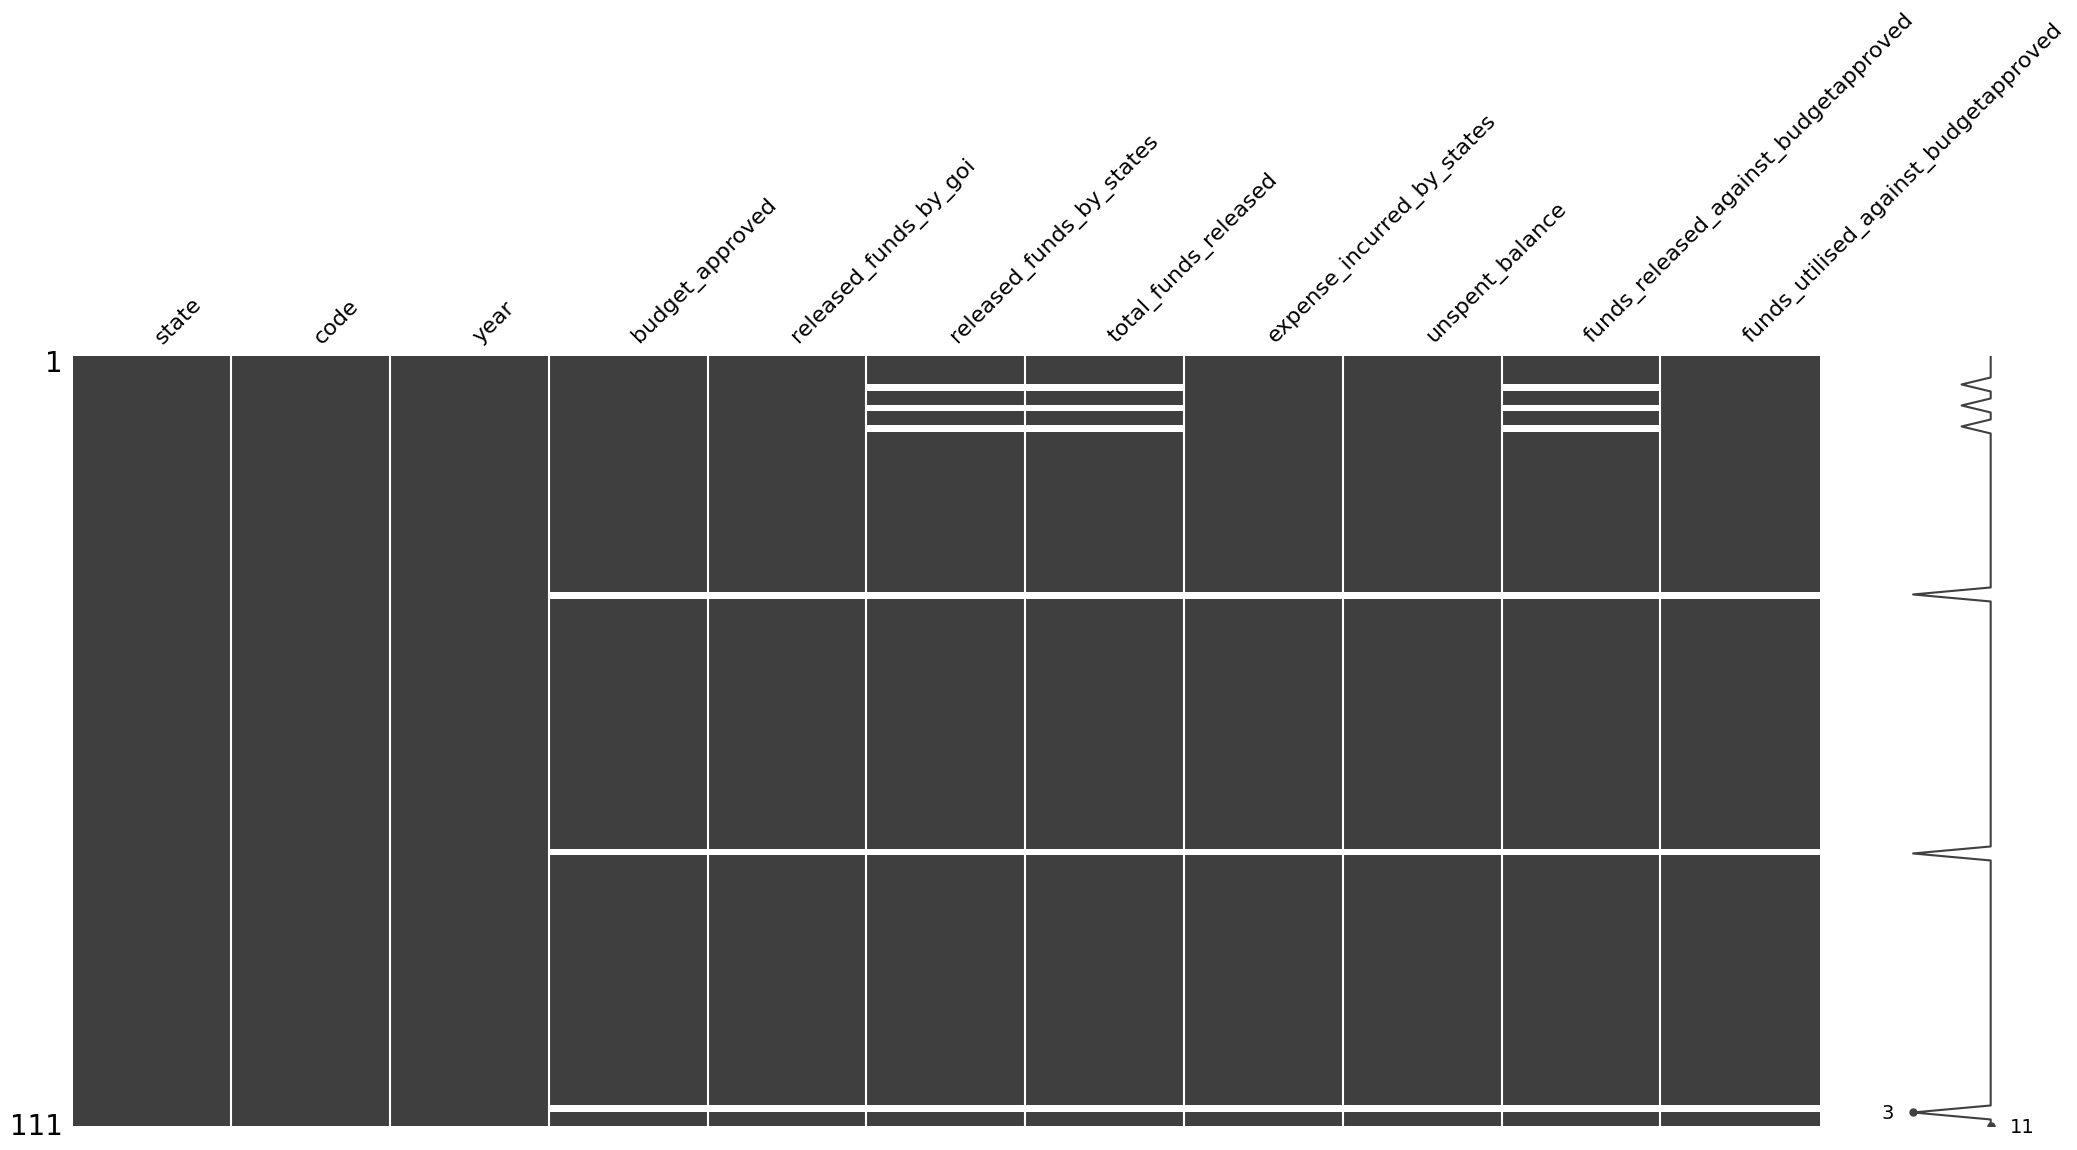

In [233]:
# Visualize missing values as a matrix
msno.matrix(ssa)

<Axes: >

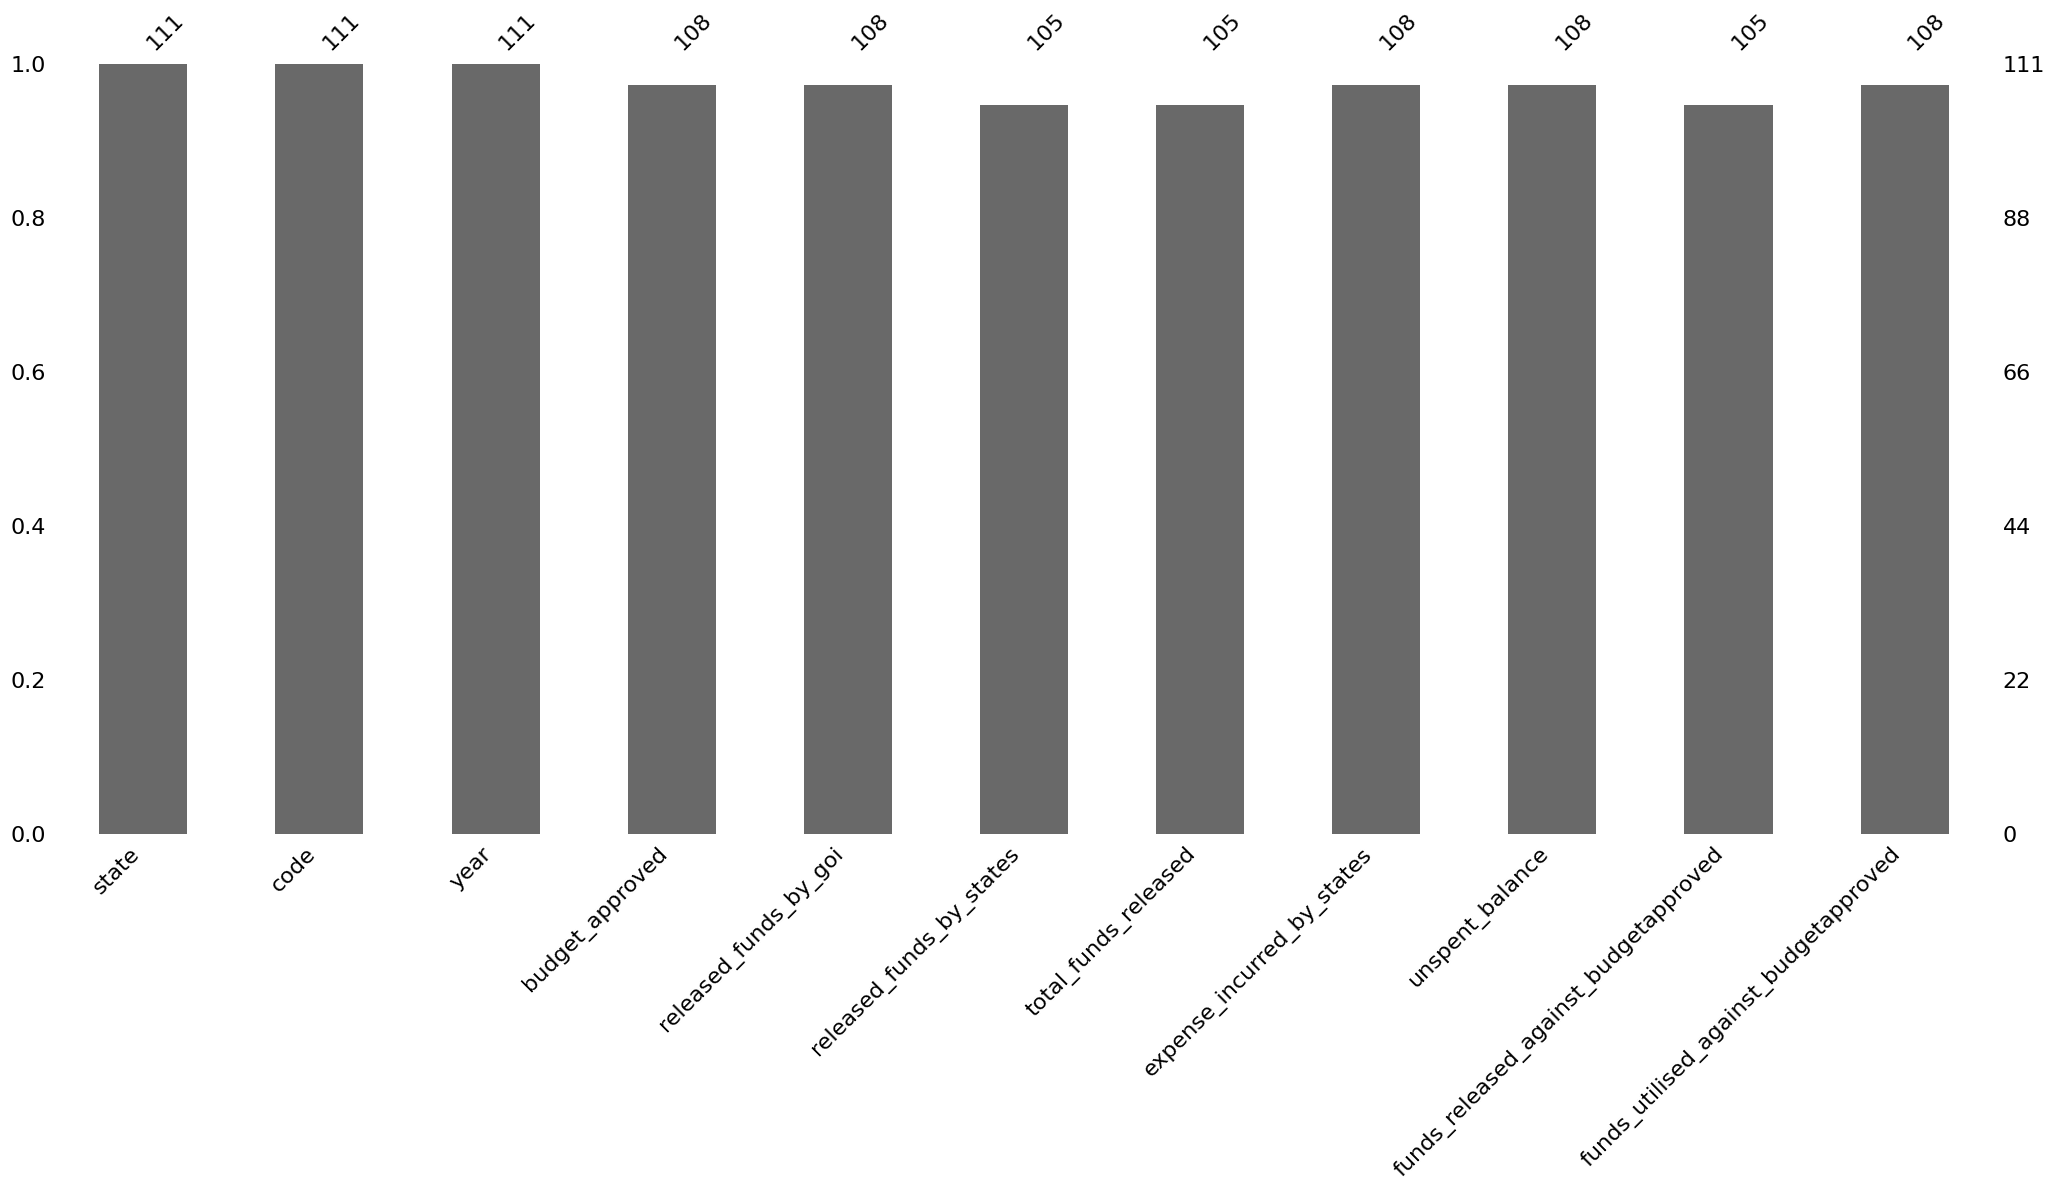

In [234]:
#Visualize the number of missing values as a bar chart
msno.bar(ssa)


The columns released_funds_by_goi and released_funds_by_states have a similar pattern of missing values while 3 rows(unknown) are Null

**3.DEALING WITH MISSING VALUES**

**Droping rows or columns**

In [235]:
ssa_null  = ssa[ssa['budget_approved'].isna()]
ssa_null

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved
34,Ladakh,35.0,2015-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Ladakh,35.0,2016-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Ladakh,35.0,2017-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Ladakh as the whole row is NAN**

In [236]:
#DELETING ALL THE ROWS WHERE STATE = Ladakh
ssa = ssa.query("state!='Ladakh'")

**All state name and column names which have null values**

In [237]:
null_columns = ssa.columns[ssa.isna().any()].tolist()
null_columns

['released_funds_by_states',
 'total_funds_released',
 'funds_released_against_budgetapproved']

In [238]:
# Rows which have null values
ssa_row= ssa[ssa.isna().any(axis=1)]
ssa_row

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved
4,Chhattisgarh,5.0,2015-2016,2149.343,622.197,NaN,NaN,1477.519,36.023,NaN,68.74
7,Haryana,8.0,2015-2016,1120.583,345.012,NaN,NaN,529.163,99.413,NaN,47.22
10,Karnataka,11.0,2015-2016,1545.808,417.593,NaN,NaN,1196.365,38.156,NaN,77.39


In [239]:
null_states = ssa_row.state.tolist()
null_states

['Chhattisgarh', 'Haryana', 'Karnataka']

We see there are 3 missing values in columns 'Funds released by the States/UTs','Total Funds Released (Government of India and States' Share)' and 'Extent of Funds Released against Budget Approved'. From above we can see that for the fiscal year 2015-2016 they are missing for all States 'Chhattisgarh','Haryana'and 'Karnataka'

**IMPUTING MISSING VALUES**

**Imputing mean of realeased_funds_in_state by funds mean by other 2years**

In [ ]:
ssa['released_funds_by_states'].loc[4] =   ssa[ssa.state == "Chhattisgarh" ]["released_funds_by_states"].mean()
ssa['released_funds_by_states'].loc[7] =   ssa[ssa.state == "Haryana" ]["released_funds_by_states"].mean()
ssa['released_funds_by_states'].loc[10] =   ssa[ssa.state == "Karnataka" ]["released_funds_by_states"].mean()

**Imputing null values of total_funds by adding released funds by government of india and states**

In [ ]:
ssa['total_funds_released'].loc[4]  = ssa['released_funds_by_goi'].loc[4] + ssa['released_funds_by_states'].loc[4]
ssa['total_funds_released'].loc[7]  = ssa['released_funds_by_goi'].loc[7] + ssa['released_funds_by_states'].loc[7]
ssa['total_funds_released'].loc[10]  = ssa['released_funds_by_goi'].loc[10] + ssa['released_funds_by_states'].loc[10]

**Imputing mean of funds_released_against_budgetapproved by funds mean by other 2 years**

In [ ]:
ssa['funds_released_against_budgetapproved'].loc[4] =   ssa[ssa.state == "Chhattisgarh" ]["funds_released_against_budgetapproved"].mean()
ssa['funds_released_against_budgetapproved'].loc[7] =   ssa[ssa.state == "Haryana" ]["funds_released_against_budgetapproved"].mean()
ssa['funds_released_against_budgetapproved'].loc[10] =   ssa[ssa.state == "Karnataka" ]["funds_released_against_budgetapproved"].mean()

**After computing for null values for states'**

In [201]:
#After computing for null values for states'
ssa[ssa.state=='Chhattisgarh']

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved
4,Chhattisgarh,5.0,2015-2016,2149.343,622.197,959.418,1581.615,1477.519,36.023,68.8015,68.74
41,Chhattisgarh,5.0,2016-2017,2351.113,592.628,1213.880,1806.508,1702.295,187.822,76.8360,72.40
78,Chhattisgarh,5.0,2017-2018,2269.452,674.129,704.956,1379.085,1601.000,31.766,60.7670,70.55


In [202]:
ssa[ssa.state=='Haryana']

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved
7,Haryana,8.0,2015-2016,1120.583,345.012,227.8495,572.8615,529.163,99.413,51.477,47.22
44,Haryana,8.0,2016-2017,1062.383,320.010,186.4190,506.4290,682.654,-0.497,47.669,64.26
81,Haryana,8.0,2017-2018,1144.678,363.550,269.2800,632.8300,712.963,132.027,55.285,62.29


In [203]:
ssa[ssa.state=='Karnataka']

,state,code,year,budget_approved,released_funds_by_goi,released_funds_by_states,total_funds_released,expense_incurred_by_states,unspent_balance,funds_released_against_budgetapproved,funds_utilised_against_budgetapproved
10,Karnataka,11.0,2015-2016,1545.808,417.593,571.3505,988.9435,1196.365,38.156,60.927,77.39
47,Karnataka,11.0,2016-2017,1878.970,544.955,300.0000,844.9550,1286.860,46.930,44.969,68.49
84,Karnataka,11.0,2017-2018,1809.880,548.820,842.7010,1391.5210,1617.764,83.196,76.885,89.39


**Again check the total number of null values in each columns**

In [204]:
ssa.isnull().sum()

state                                    0
code                                     0
year                                     0
budget_approved                          0
released_funds_by_goi                    0
released_funds_by_states                 0
total_funds_released                     0
expense_incurred_by_states               0
unspent_balance                          0
funds_released_against_budgetapproved    0
funds_utilised_against_budgetapproved    0
dtype: int64

#PART -3 



**1. Identify Significant Correlations**

**2.Analytical questions & answer**

2.1 Calculating the average growth of state budget for the duration 2015-16, 2016-17 and 2017-18 by taking the mean of the row '(% Growth over previous year)'

In [240]:
ssa.iloc[:,[0,2,3]]

,state,year,budget_approved
0,Andhra Pradesh,2015-2016,2116.062
1,Arunachal Pradesh,2015-2016,358.645
2,Assam,2015-2016,1682.157
3,Bihar,2015-2016,7387.148
4,Chhattisgarh,2015-2016,2149.343
...,...,...,...
105,Daman & Diu,2017-2018,10.150
106,Delhi,2017-2018,347.800
107,Jammu & Kashmir,2017-2018,2362.016
109,Lakshadweep,2017-2018,3.700
